### 2.3: Fundamentals of Visualization Libraries Part 1

In [134]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [136]:
import matplotlib as mpl
matplotlib.__version__

'3.8.4'

In [138]:
df = pd.read_csv('/Users/katiedallarosa/Desktop/CitiBike/nymerged_data.csv', index_col = 0)

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_1719/1183187172.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/katiedallarosa/Desktop/CitiBike/nymerged_data.csv', index_col = 0)


In [139]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [142]:
# Remove merge column

df.drop(columns = {'_merge'}, inplace = True)

In [144]:
# Check data

df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,0,344EB2CD04CD1B71,classic_bike,2022-04-13 18:46:17.884,2022-04-13 18:54:21.655,Lafayette St & Jersey St,5561.06,W 15 St & 6 Ave,5989.02,40.724561,-73.995653,40.738046,-73.996430,member,2022-04-13,19.1
1,1,17248543C251F4FB,electric_bike,2022-06-24 16:08:25.267,2022-06-24 16:23:26.771,W 29 St & 9 Ave,6416.06,Spring St & Hudson St,5653.12,40.750073,-73.998393,40.725840,-74.007653,casual,2022-06-24,25.6
2,2,43658D9AB9938656,classic_bike,2022-05-28 18:39:18.883,2022-05-28 19:09:58.450,N 11 St & Kent Ave,5489.04,Kent Ave & N 7 St,5489.03,40.722482,-73.959219,40.720368,-73.961651,casual,2022-05-28,16.1
3,3,0158721C43867EFE,classic_bike,2022-04-29 19:33:55.052,2022-04-29 19:40:16.920,DeKalb Ave & Hudson Ave,4513.06,Flushing Ave & Vanderbilt Ave,4762.05,40.689888,-73.981013,40.697950,-73.970776,casual,2022-04-29,11.9
4,4,B08E1E3FFC1F965B,classic_bike,2022-09-30 09:43:40.072,2022-09-30 09:58:17.811,Christopher St & Greenwich St,5847.01,7 Ave S & Bleecker St,5805.07,40.732916,-74.007114,40.732139,-74.003638,member,2022-09-30,13.2


In [146]:
# Check shape

df.shape

(7459541, 16)

In [148]:
# Check data types

df.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [150]:
# Convert date column to datetime object

df['date'] = pd.to_datetime(df['date'])

In [152]:
# Recheck dtypes

df.dtypes

Unnamed: 0                     int64
ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe.

In [164]:
# Increase agg.path.chunksize to avoid the OverflowError

mpl.rcParams['agg.path.chunksize'] = 10000

In [157]:
df_temp = df.set_index('date')

In [162]:
df_temp.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,value
date,,,,,,,,,,,,,,,,
2022-04-13,0,344EB2CD04CD1B71,classic_bike,2022-04-13 18:46:17.884,2022-04-13 18:54:21.655,Lafayette St & Jersey St,5561.06,W 15 St & 6 Ave,5989.02,40.724561,-73.995653,40.738046,-73.996430,member,19.1,1
2022-06-24,1,17248543C251F4FB,electric_bike,2022-06-24 16:08:25.267,2022-06-24 16:23:26.771,W 29 St & 9 Ave,6416.06,Spring St & Hudson St,5653.12,40.750073,-73.998393,40.725840,-74.007653,casual,25.6,1
2022-05-28,2,43658D9AB9938656,classic_bike,2022-05-28 18:39:18.883,2022-05-28 19:09:58.450,N 11 St & Kent Ave,5489.04,Kent Ave & N 7 St,5489.03,40.722482,-73.959219,40.720368,-73.961651,casual,16.1,1
2022-04-29,3,0158721C43867EFE,classic_bike,2022-04-29 19:33:55.052,2022-04-29 19:40:16.920,DeKalb Ave & Hudson Ave,4513.06,Flushing Ave & Vanderbilt Ave,4762.05,40.689888,-73.981013,40.697950,-73.970776,casual,11.9,1
2022-09-30,4,B08E1E3FFC1F965B,classic_bike,2022-09-30 09:43:40.072,2022-09-30 09:58:17.811,Christopher St & Greenwich St,5847.01,7 Ave S & Bleecker St,5805.07,40.732916,-74.007114,40.732139,-74.003638,member,13.2,1


<Axes: xlabel='date'>

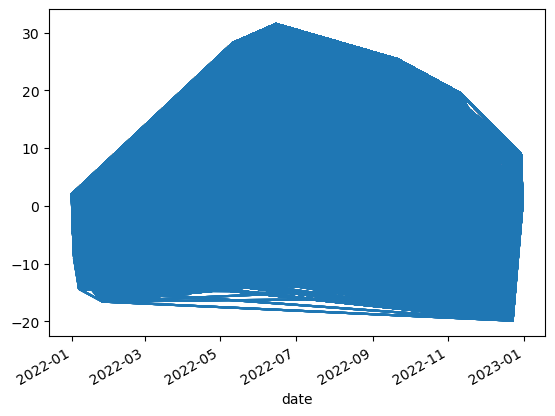

In [166]:
# Create simple plot

df_temp['avgTemp'].plot()